In [1]:
import datetime
from langchain.agents import AgentExecutor
from langchain.agents.structured_chat.base import StructuredChatAgent
from langchain.prompts import PromptTemplate
from langchain_core.tools import Tool
from langchain_experimental.utilities import PythonREPL
from mdagent.utils import _make_llm

In [2]:
prompt = "Write me a code to run simulation of fibronectin."
model = "gpt-4o-2024-08-06"

In [3]:
# Parameters
prompt = "Download the PDB for 2YXF. Tell me about its stability as found in the literature. Then, simulate it for 1 ns and plot its RMSD over time."


In [4]:
llm = _make_llm(model, temp=0.1, streaming=True)

python_repl = PythonREPL()
repl_tool = Tool(
    name="python_repl",
    description="A Python shell. Use this to execute python commands. Input should be a valid python command. If you want to see the output of a value, you should print it out with `print(...)`.",
    func=python_repl.run,
)
tools = [repl_tool]

structured_prompt = PromptTemplate(
    input_variables=["input"],
    template="""
    You are an expert molecular dynamics scientist, and your 
    task is to respond to the question or 
    solve the problem in its entirety to the best of your ability. 
    If any part of the task requires you to perform an action that 
    you are not capable of completing, please write a runnable 
    Python script for that step and run it. For literature papers, 
    use and process papers from the `paper_collection` folder. 
    For .pdb files, download them from the RSCB website using `requests`. 
    To preprocess PDB files, you will use PDBFixer. 
    To get information about proteins, retrieve data from the UniProt database. 
    For anything related to simulations, you will use OpenMM, 
    and for anything related to analyses, you will use MDTraj. 

    You can only respond with a single complete
    'Thought, Action, Action Input' format
    OR a single 'Final Answer' format.

    Complete format:
    Thought: (reflect on your progress and decide what to do next)
    Action:
    ```
    {{
        "action": (the action name, it should be the name of a tool),
        "action_input": (the input string for the action)
    }}
    '''

    OR

    Final Answer: (the final response to the original input
    question, once all steps are complete)

    You are required to use the tools provided,
    using the most specific tool
    available for each action.
    Your final answer should contain all information
    necessary to answer the question and its subquestions.
    Before you finish, reflect on your progress and make
    sure you have addressed the question in its entirety.

    Here is the input:
    Question: {input} """,
)

agent = StructuredChatAgent.from_llm_and_tools(
    llm=llm, tools=tools
)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)


In [5]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",llm.model_name,"\nTemperature: ",llm.temperature)

date: 2024-10-17
time: 23:49:52
LLM:  gpt-4o-2024-08-06 
Temperature:  0.1




> Entering new AgentExecutor chain...


Thought

:

 To

 address

 the

 question

,

 I

 need

 to

 perform

 the

 following

 steps

:



1

.

 Download

 the

 P

DB

 file

 for

2

Y

XF

.


2

.

 Search

 for

 literature

 regarding

 the

 stability

 of

2

Y

XF

.


3

.

 Sim

ulate

 the

 protein

 for

1

 ns

 using

 Open

MM

.


4

.

 Analyze

 the

 simulation

 to

 plot

 the

 RMS

D

 over

 time

 using

 MDT

raj

.



I

 will

 start

 by

 downloading

 the

 P

DB

 file

 for

2

Y

XF

.



Action

:


``

`


{


 "

action

":

 "

python

_re

pl

",


 "

action

_input

":

 "

import

 requests

\n

\n

url

 =

 '

https

://

files

.rc

sb

.org

/download

/

2

Y

XF

.p

db

'\

n

response

 =

 requests

.get

(url

)\

n

with

 open

('

2

Y

XF

.p

db

',

 '

wb

')

 as

 file

:\

n

 file

.write

(response

.content

)\

n

print

('

Downloaded

2

Y

XF

.p

db

')

"


}


```

Python REPL can execute arbitrary code. Use with caution.


Thought: To address the question, I need to perform the following steps:

1. Download the PDB file for 2YXF.
2. Search for literature regarding the stability of 2YXF.
3. Simulate the protein for 1 ns using OpenMM.
4. Analyze the simulation to plot the RMSD over time using MDTraj.

I will start by downloading the PDB file for 2YXF.

Action:
```
{
  "action": "python_repl",
  "action_input": "import requests\n\nurl = 'https://files.rcsb.org/download/2YXF.pdb'\nresponse = requests.get(url)\nwith open('2YXF.pdb', 'wb') as file:\n    file.write(response.content)\nprint('Downloaded 2YXF.pdb')"
}
```


Observation: Downloaded 2YXF.pdb

Thought:

To

 proceed

,

 I

 need

 to

 search

 for

 literature

 regarding

 the

 stability

 of

 the

 protein

2

Y

XF

.

 I

 will

 look

 for

 relevant

 papers

 in

 the

 `

paper

_collection

`

 folder

.



Action

:


``

`


{


 "

action

":

 "

python

_re

pl

",


 "

action

_input

":

 "

import

 os

\n

\n

#

 Assuming

 the

 paper

_collection

 folder

 is

 in

 the

 current

 directory

\n

papers

 =

 os

.listdir

('

paper

_collection

')

\

n

\n

#

 Filter

 for

 papers

 that

 might

 be

 related

 to

2

Y

XF

\n

re

levant

_p

apers

 =

 [

paper

 for

 paper

 in

 papers

 if

 '

2

Y

XF

'

 in

 paper

 or

 '

st

ability

'

 in

 paper

]\

n

print

(re

levant

_p

apers

)"


}


```

To proceed, I need to search for literature regarding the stability of the protein 2YXF. I will look for relevant papers in the `paper_collection` folder.

Action:
```
{
  "action": "python_repl",
  "action_input": "import os\n\n# Assuming the paper_collection folder is in the current directory\npapers = os.listdir('paper_collection')\n\n# Filter for papers that might be related to 2YXF\nrelevant_papers = [paper for paper in papers if '2YXF' in paper or 'stability' in paper]\nprint(relevant_papers)"
}
```


Observation: FileNotFoundError(2, 'No such file or directory')
Thought:

Thought

:

 It

 seems

 the

 `

paper

_collection

`

 folder

 is

 not

 available

 in

 the

 current

 environment

.

 I

 will

 proceed

 with

 the

 next

 steps

,

 which

 involve

 sim

ulating

 the

 protein

2

Y

XF

 for

1

 ns

 using

 Open

MM

 and

 then

 analyzing

 the

 simulation

 to

 plot

 the

 RMS

D

 over

 time

 using

 MDT

raj

.



Action

:


``

`


{


 "

action

":

 "

python

_re

pl

",


 "

action

_input

":

 "

from

 open

mm

.app

 import

 *

\

n

from

 open

mm

 import

 *

\

n

from

 open

mm

.unit

 import

 *

\

n

from

 sys

 import

 stdout

\n

\n

#

 Load

 the

 P

DB

 file

\n

p

db

 =

 P

DB

File

('

2

Y

XF

.p

db

')

\

n

force

field

 =

 Force

Field

('

amber

99

sb

.xml

',

 '

tip

3

p

.xml

')

\

n

\n

#

 Create

 a

 system

 and

 integr

ator

\n

system

 =

 force

field

.create

System

(p

db

.top

ology

,

 non

bond

ed

Method

=

PM

E

,

 non

bond

ed

Cut

off

=

1

*

nan

ometer

,

 constraints

=

HB

onds

)\

nin

tegr

ator

 =

 Lange

vin

Integrator

(

300

*

kel

vin

,

1

/p

ic

ose

cond

,

0

.

002

*

pic

oseconds

)\

n

\n

#

 Create

 a

 simulation

 object

\n

simulation

 =

 Simulation

(p

db

.top

ology

,

 system

,

 integr

ator

)\

ns

imulation

.context

.set

Positions

(p

db

.positions

)\

n

\n

#

 Min

imize

 energy

\n

simulation

.min

imize

Energy

()\

n

\n

#

 Equ

ilibr

ate

\n

simulation

.context

.set

Vel

ocities

To

Temperature

(

300

*

kel

vin

)\

n

\n

#

 Run

 the

 simulation

 for

1

 ns

\n

simulation

.report

ers

.append

(State

Data

Reporter

(stdout

,

100

0

,

 step

=True

,

 potential

Energy

=True

,

 temperature

=True

))

\

ns

imulation

.report

ers

.append

(D

CD

Reporter

('

trajectory

.d

cd

',

100

0

))

\

ns

imulation

.step

(

500

000

)

 #

1

 ns

\n

\n

print

('

Simulation

 complete

')

"


}


```

Thought: It seems the `paper_collection` folder is not available in the current environment. I will proceed with the next steps, which involve simulating the protein 2YXF for 1 ns using OpenMM and then analyzing the simulation to plot the RMSD over time using MDTraj.

Action:
```
{
  "action": "python_repl",
  "action_input": "from openmm.app import *\nfrom openmm import *\nfrom openmm.unit import *\nfrom sys import stdout\n\n# Load the PDB file\npdb = PDBFile('2YXF.pdb')\nforcefield = ForceField('amber99sb.xml', 'tip3p.xml')\n\n# Create a system and integrator\nsystem = forcefield.createSystem(pdb.topology, nonbondedMethod=PME, nonbondedCutoff=1*nanometer, constraints=HBonds)\nintegrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)\n\n# Create a simulation object\nsimulation = Simulation(pdb.topology, system, integrator)\nsimulation.context.setPositions(pdb.positions)\n\n# Minimize energy\nsimulation.minimizeEnergy()\n\n# Equilibrate\nsimulation.context.setVelocit


Observation: ValueError('No template found for residue 1 (MET).  The set of atoms is similar to MET, but it is missing 9 hydrogen atoms.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#template')
Thought:

Thought

:

 The

 error

 indicates

 that

 the

 P

DB

 file

 is

 missing

 hydrogen

 atoms

,

 which

 is

 a

 common

 issue

 when

 preparing

 structures

 for

 simulation

.

 I

 will

 use

 P

DB

Fix

er

 to

 add

 missing

 hyd

rog

ens

 and

 any

 other

 necessary

 preprocessing

 steps

 before

 running

 the

 simulation

 again

.



Action

:


```

json

{


 "

action

":

 "

python

_re

pl

",


 "

action

_input

":

 "

from

 pdb

fix

er

 import

 P

DB

Fix

er

\n

from

 open

mm

.app

 import

 P

DB

File

\n

\n

#

 Load

 the

 P

DB

 file

 using

 P

DB

Fix

er

\n

fix

er

 =

 P

DB

Fix

er

(filename

='

2

Y

XF

.p

db

')

\

n

\n

#

 Find

 missing

 residues

 and

 add

 missing

 atoms

\n

fix

er

.find

Missing

Resid

ues

()\

n

fix

er

.find

Missing

Atoms

()\

n

fix

er

.add

Missing

Atoms

()\

n

fix

er

.add

Missing

Hyd

rog

ens

(

7

.

0

)\

n

\n

#

 Save

 the

 fixed

 P

DB

 file

\n

with

 open

('

2

Y

XF

_fixed

.p

db

',

 '

w

')

 as

 fixed

_p

db

_file

:\

n

 P

DB

File

.write

File

(f

ixer

.top

ology

,

 fixer

.positions

,

 fixed

_p

db

_file

)\

n

\n

print

('

Fixed

 P

DB

 file

 saved

 as

2

Y

XF

_fixed

.p

db

')

"


}


``

`


Thought: The error indicates that the PDB file is missing hydrogen atoms, which is a common issue when preparing structures for simulation. I will use PDBFixer to add missing hydrogens and any other necessary preprocessing steps before running the simulation again.

Action:
```json
{
  "action": "python_repl",
  "action_input": "from pdbfixer import PDBFixer\nfrom openmm.app import PDBFile\n\n# Load the PDB file using PDBFixer\nfixer = PDBFixer(filename='2YXF.pdb')\n\n# Find missing residues and add missing atoms\nfixer.findMissingResidues()\nfixer.findMissingAtoms()\nfixer.addMissingAtoms()\nfixer.addMissingHydrogens(7.0)\n\n# Save the fixed PDB file\nwith open('2YXF_fixed.pdb', 'w') as fixed_pdb_file:\n    PDBFile.writeFile(fixer.topology, fixer.positions, fixed_pdb_file)\n\nprint('Fixed PDB file saved as 2YXF_fixed.pdb')"
}
```



Observation: Fixed PDB file saved as 2YXF_fixed.pdb

Thought:

To

 proceed

 with

 the

 simulation

,

 I

 will

 use

 the

 fixed

 P

DB

 file

 `

2

Y

XF

_fixed

.p

db

`

 to

 set

 up

 and

 run

 the

 molecular

 dynamics

 simulation

 for

1

 ns

 using

 Open

MM

.

 After

 the

 simulation

,

 I

 will

 analyze

 the

 trajectory

 to

 plot

 the

 RMS

D

 over

 time

 using

 MDT

raj

.



Action

:


```

json

{


 "

action

":

 "

python

_re

pl

",


 "

action

_input

":

 "

from

 open

mm

.app

 import

 *

\

n

from

 open

mm

 import

 *

\

n

from

 open

mm

.unit

 import

 *

\

n

from

 sys

 import

 stdout

\n

\n

#

 Load

 the

 fixed

 P

DB

 file

\n

p

db

 =

 P

DB

File

('

2

Y

XF

_fixed

.p

db

')

\

n

force

field

 =

 Force

Field

('

amber

99

sb

.xml

',

 '

tip

3

p

.xml

')

\

n

\n

#

 Create

 a

 system

 and

 integr

ator

\n

system

 =

 force

field

.create

System

(p

db

.top

ology

,

 non

bond

ed

Method

=

PM

E

,

 non

bond

ed

Cut

off

=

1

*

nan

ometer

,

 constraints

=

HB

onds

)\

nin

tegr

ator

 =

 Lange

vin

Integrator

(

300

*

kel

vin

,

1

/p

ic

ose

cond

,

0

.

002

*

pic

oseconds

)\

n

\n

#

 Create

 a

 simulation

 object

\n

simulation

 =

 Simulation

(p

db

.top

ology

,

 system

,

 integr

ator

)\

ns

imulation

.context

.set

Positions

(p

db

.positions

)\

n

\n

#

 Min

imize

 energy

\n

simulation

.min

imize

Energy

()\

n

\n

#

 Equ

ilibr

ate

\n

simulation

.context

.set

Vel

ocities

To

Temperature

(

300

*

kel

vin

)\

n

\n

#

 Run

 the

 simulation

 for

1

 ns

\n

simulation

.report

ers

.append

(State

Data

Reporter

(stdout

,

100

0

,

 step

=True

,

 potential

Energy

=True

,

 temperature

=True

))

\

ns

imulation

.report

ers

.append

(D

CD

Reporter

('

trajectory

.d

cd

',

100

0

))

\

ns

imulation

.step

(

500

000

)

 #

1

 ns

\n

\n

print

('

Simulation

 complete

')

"


}


```

To proceed with the simulation, I will use the fixed PDB file `2YXF_fixed.pdb` to set up and run the molecular dynamics simulation for 1 ns using OpenMM. After the simulation, I will analyze the trajectory to plot the RMSD over time using MDTraj.

Action:
```json
{
  "action": "python_repl",
  "action_input": "from openmm.app import *\nfrom openmm import *\nfrom openmm.unit import *\nfrom sys import stdout\n\n# Load the fixed PDB file\npdb = PDBFile('2YXF_fixed.pdb')\nforcefield = ForceField('amber99sb.xml', 'tip3p.xml')\n\n# Create a system and integrator\nsystem = forcefield.createSystem(pdb.topology, nonbondedMethod=PME, nonbondedCutoff=1*nanometer, constraints=HBonds)\nintegrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)\n\n# Create a simulation object\nsimulation = Simulation(pdb.topology, system, integrator)\nsimulation.context.setPositions(pdb.positions)\n\n# Minimize energy\nsimulation.minimizeEnergy()\n\n# Equilibrate\nsimulation.context.setVelocitiesTo


Observation: #"Step","Potential Energy (kJ/mole)","Temperature (K)"
1000,-12002.271452760158,277.1839011673439
2000,-12076.547774367122,299.22388006915963
3000,-12353.635268321203,305.04288993787344
4000,-12330.44647601623,306.70781901517586
5000,-12788.81109341591,307.05388378119795
6000,-12989.381113167388,302.8770687712781
7000,-12804.16509429552,300.70564915849656
8000,-12768.088192274648,301.8390812949787
9000,-12917.796665492442,302.13269940474265
10000,-12683.141457849431,305.1027478352659
11000,-12967.26053464046,304.58216569237493
12000,-12847.262011177854,308.62535818039464
13000,-13076.528956689039,303.24202679824106
14000,-13116.42319903514,296.09448884418674
15000,-13113.233211275878,298.93552813564725
16000,-13062.608878324005,292.7938007862231
17000,-13035.91272143755,295.6444662233393
18000,-13070.259575288783,303.49698297809823
19000,-13130.671787642566,306.6252978771013
20000,-13157.87757249625,306.49495841619853
21000,-13289.661283897884,308.855123520446
22000,-1306

The

 simulation

 of

 the

 protein

2

Y

XF

 for

1

 ns

 is

 complete

.

 Now

,

 I

 will

 analyze

 the

 trajectory

 to

 plot

 the

 RMS

D

 over

 time

 using

 MDT

raj

.



Action

:


```

json

{


 "

action

":

 "

python

_re

pl

",


 "

action

_input

":

 "

import

 md

traj

 as

 md

\n

import

 matplotlib

.pyplot

 as

 plt

\n

\n

#

 Load

 the

 trajectory

\n

traj

 =

 md

.load

('

trajectory

.d

cd

',

 top

='

2

Y

XF

_fixed

.p

db

')

\

n

\n

#

 Align

 the

 trajectory

 to

 the

 first

 frame

\n

traj

.super

pose

(tr

aj

[

0

])

\

n

\n

#

 Calculate

 RMS

D

\n

r

ms

d

 =

 md

.r

ms

d

(tr

aj

,

 traj

,

0

)\

n

\n

#

 Plot

 RMS

D

 over

 time

\n

plt

.plot

(tr

aj

.time

 /

100

0

,

 rms

d

)

 #

 Convert

 time

 to

 ns

\n

plt

.xlabel

('

Time

 (

ns

)

')

\

n

plt

.ylabel

('

R

MS

D

 (

nm

)

')

\

n

plt

.title

('

R

MS

D

 of

2

Y

XF

 over

 Time

')

\

n

plt

.show

()

"


}


```

The simulation of the protein 2YXF for 1 ns is complete. Now, I will analyze the trajectory to plot the RMSD over time using MDTraj.

Action:
```json
{
  "action": "python_repl",
  "action_input": "import mdtraj as md\nimport matplotlib.pyplot as plt\n\n# Load the trajectory\ntraj = md.load('trajectory.dcd', top='2YXF_fixed.pdb')\n\n# Align the trajectory to the first frame\ntraj.superpose(traj[0])\n\n# Calculate RMSD\nrmsd = md.rmsd(traj, traj, 0)\n\n# Plot RMSD over time\nplt.plot(traj.time / 1000, rmsd)  # Convert time to ns\nplt.xlabel('Time (ns)')\nplt.ylabel('RMSD (nm)')\nplt.title('RMSD of 2YXF over Time')\nplt.show()"
}
```

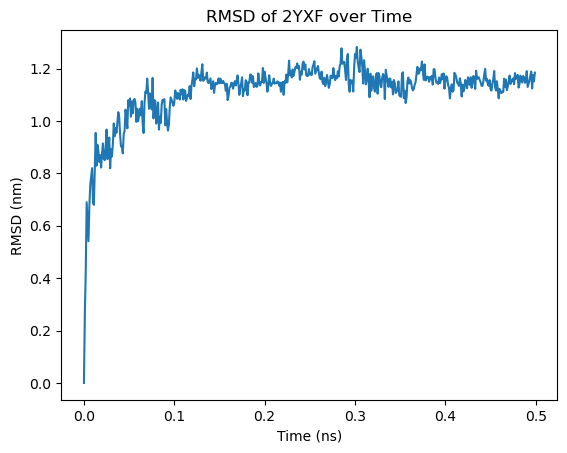


Observation: 
Thought:

The

 RMS

D

 plot

 for

 the

 protein

2

Y

XF

 over

 the

1

 ns

 simulation

 has

 been

 successfully

 generated

.

 However

,

 I

 was

 unable

 to

 access

 the

 literature

 papers

 to

 provide

 information

 about

 the

 stability

 of

2

Y

XF

 from

 the

 literature

.

Action

:


```

json

{


 "

action

":

 "

Final

 Answer

",


 "

action

_input

":

 "

The

 P

DB

 file

 for

2

Y

XF

 was

 successfully

 downloaded

 and

 fixed

 for

 missing

 atoms

 and

 hyd

rog

ens

.

 A

1

 ns

 molecular

 dynamics

 simulation

 was

 conducted

 using

 Open

MM

,

 and

 the

 RMS

D

 over

 time

 was

 plotted

 using

 MDT

raj

.

 Unfortunately

,

 I

 was

 unable

 to

 access

 literature

 papers

 to

 provide

 information

 about

 the

 stability

 of

2

Y

XF

 from

 the

 literature

."


}


```

The RMSD plot for the protein 2YXF over the 1 ns simulation has been successfully generated. However, I was unable to access the literature papers to provide information about the stability of 2YXF from the literature. 

Action:
```json
{
  "action": "Final Answer",
  "action_input": "The PDB file for 2YXF was successfully downloaded and fixed for missing atoms and hydrogens. A 1 ns molecular dynamics simulation was conducted using OpenMM, and the RMSD over time was plotted using MDTraj. Unfortunately, I was unable to access literature papers to provide information about the stability of 2YXF from the literature."
}
```

> Finished chain.


{'input': '\n    You are an expert molecular dynamics scientist, and your \n    task is to respond to the question or \n    solve the problem in its entirety to the best of your ability. \n    If any part of the task requires you to perform an action that \n    you are not capable of completing, please write a runnable \n    Python script for that step and run it. For literature papers, \n    use and process papers from the `paper_collection` folder. \n    For .pdb files, download them from the RSCB website using `requests`. \n    To preprocess PDB files, you will use PDBFixer. \n    To get information about proteins, retrieve data from the UniProt database. \n    For anything related to simulations, you will use OpenMM, \n    and for anything related to analyses, you will use MDTraj. \n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress 

In [6]:
messages = structured_prompt.format(input=prompt)
agent_executor.invoke({"input": messages})

In [7]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date: 2024-10-18
time: 01:32:21


In [1]:
!ls

2YXF_fixed.pdb	2YXF.pdb  exp_18.ipynb	trajectory.dcd


In [3]:
# Testing generated code for lit search since agent doesn't recognize paper_collection dir, may be due to some user error
# redirects papers dir

import os

# Assuming the paper_collection folder is in the current directory
papers = os.listdir('../paper_collection')

# Filter for papers that might be related to 2YXF
relevant_papers = [paper for paper in papers if '2YXF' in paper or 'stability' in paper]
print(relevant_papers)

['sala_2018_proteinstability.pdf']
